# Efficiency by aircraft type

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from cmocean import cm as cmo
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors

In [3]:
aircrafts = pd.read_csv("../data/by_aircrafttype.csv")
aircrafts


,aircraftiatacode,airlines,avg_distance,flown_distance,gcd,flights,passengers,seats,average_load,co2,gco2_pax_km
0,320,201,1290.353509,6.887622e+09,6.403206e+09,5337779,7.448377e+08,916999968,0.810203,7.951892e+07,91.852775
1,73H,57,1488.731701,3.518290e+09,3.299291e+09,2363280,3.619091e+08,426446117,0.845671,4.160391e+07,84.161219
2,738,99,1474.877385,3.632981e+09,3.404605e+09,2463243,3.311885e+08,422482143,0.782759,3.972434e+07,87.358750
3,321,92,1550.889075,3.079456e+09,2.893377e+09,1985607,3.143021e+08,393551000,0.796832,4.274776e+07,95.511660
4,319,68,1148.747855,1.634823e+09,1.509990e+09,1423135,1.577783e+08,195029415,0.806593,1.857196e+07,114.455800
...,...,...,...,...,...,...,...,...,...,...,...
111,D38,1,598.517578,3.208054e+05,2.832054e+05,536,1.220304e+04,15544,0.785064,1.393368e+03,191.446537
112,EP3,1,2119.644830,3.018374e+06,2.875974e+06,1424,9.214142e+03,11392,0.808826,6.978331e+03,357.733646
113,M88,1,1078.862158,6.904718e+04,6.264718e+04,64,8.960248e+03,11008,0.813976,1.088772e+03,113.744713
114,313,1,2482.329026,9.432850e+04,9.052850e+04,38,4.365961e+03,7600,0.574469,1.666582e+03,170.316653


# Sort aircafts by passenger distance

In [ ]:
intensity = np.array(aircrafts['gco2_pax_km'])
co2 = np.array(aircrafts['co2'])
passenger_distance = np.array(aircrafts['passengers'] * aircrafts['flown_distance'])
code = np.array(aircrafts['aircraftiatacode'])
order = np.argsort(passenger_distance)

intensity = intensity[order]
co2 = co2[order]
code = code[order]
passenger_distance = passenger_distance[order] / 9460730472580.8 / 1000**2
passenger_distance_accumulated = np.hstack((np.zeros(1), np.cumsum(passenger_distance)))


# Plotting

Plot the accumulated passenger distance across all aircraft types to create a bar plot with intensity on the y-axis, passenger distance on the x-axis so that the area of the bar is the co2 of that aircraft type

In [142]:
# truncated colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('magma_r')
new_cmap = truncate_colormap(cmap, 0.1, 0.6)

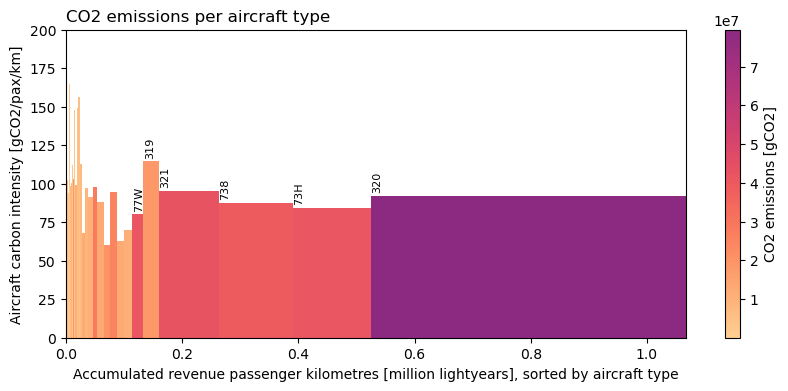

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

cmap = plt.get_cmap("magma_r")
ax.bar(passenger_distance_accumulated[:-1], intensity,
       width=passenger_distance,
       color = new_cmap(co2/co2.max()),
       align='edge', edgecolor='none')

# manual colorbar
norm = colors.Normalize(vmin=co2.min(),vmax=co2.max())
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='CO2 emissions [gCO2]')

# add aircraft type labels
n = 6
for i, txt in enumerate(code[-n:]):
    i += len(passenger_distance) - n
    ax.annotate(txt, (passenger_distance_accumulated[i], intensity[i]),
                    xytext=(1, 4), textcoords='offset points', fontsize=8, rotation=90)


ax.set_xlim(0, passenger_distance_accumulated[-1])
ax.set_ylim(0, 200)
ax.set_title("CO2 emissions per aircraft type", loc='left')
ax.set_xlabel("Accumulated revenue passenger kilometres [million lightyears], sorted by aircraft type")
ax.set_ylabel("Aircraft carbon intensity [gCO2/pax/km]")

plt.show()